<hr/>

#Data Mining [EN.550.436]
**Tamás Budavári** - budavari@jhu.edu <br/>
**Assignment #1** - Sept 26, 2016


<hr/>

<h1><font color="darkblue">Assignment #1</font></h1>

#### Author
Anshul Subramanya
asubra12
Data Mining EN.550.436

#### Dependencies
Requires numpy, pandas, matplotlib, scipy

#### Deadline
Homework is due by 11am on Wednesday, October 5, and should be submitted on Blackboard. Don't wait till the last minute!

####  Work alone!
Please work on you own on these assignments! 

### Problem 1

- Characterize the data set in this [CSV](A1-Problem1.csv) file using descriptive statistics. This comma-separated separated file contains just 1 column with 1000 rows.

> 0. Load data, e.g., using pandas (1 pt)
> 0. Calculate the relevant quantitative measures (2 pts)
> 0. Create informative illustration that help better understand the data (1 pt)
> 0. Summarize your findings with your own words (1 pt)

> Total of 5 points

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Question 1
dat = np.matrix(pd.read_csv('A1-Problem1.csv', header=None).as_matrix())


In [2]:
# Question 2
mean = float(dat.mean())
sd = float(dat.std())
var = float(dat.var())

print ("The Mean, Std Dev, and Var of the entire dataset are {}, {}, and {}, respectively".format(mean, sd, var))

The Mean, Std Dev, and Var of the entire dataset are -48.8550851071, 0.634309720296, and 0.402348821262, respectively


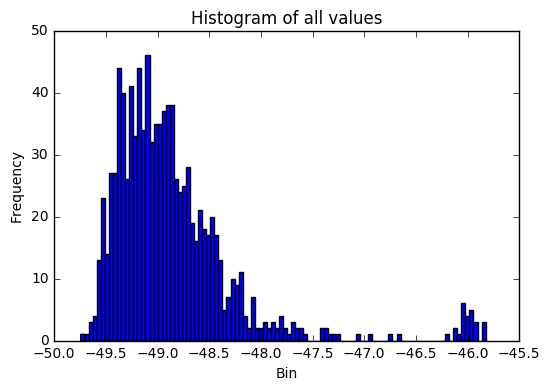

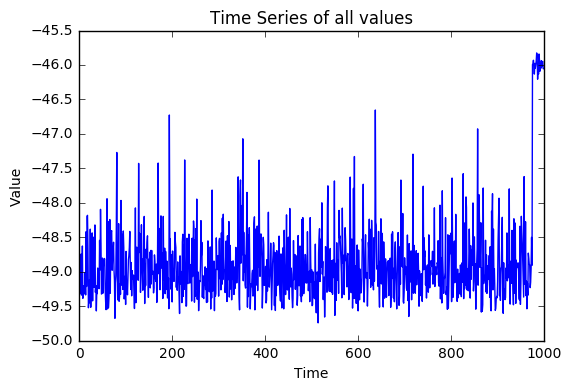

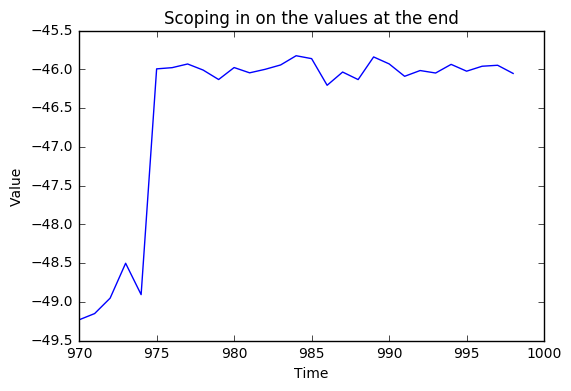

In [3]:
%matplotlib inline
# Question 3

plt.figure()
plt.title('Histogram of all values')
plt.xlabel('Bin')
plt.ylabel('Frequency')
plt.hist(dat, 100)

plt.figure()
plt.title('Time Series of all values')
plt.xlabel('Time')
plt.ylabel('Value')
plt.plot(dat)

plt.figure()
plt.title('Scoping in on the values at the end')
plt.xlabel('Time')
plt.ylabel('Value')
x = np.arange(970, 999, 1)
plt.plot(x, dat[970:999])

#### Question 1 Part 4

Our plots show us that the data is quite noisy, and fluctuates around a value of -49.0 for the first 975 points. Data values range between -49.7 and -46.7 for these first 975 iterations as well. After the 975th iteration, the values jump to approximately -46.0, with a very small spread as well. 

A histogram for the data reveals a distribution akin to a Poisson or Gamma distribution for values 0 through 975 due to the long right-hand tail of values, and potentially a normal distribution for values after i=975.

### Problem 2

- Fit functions to the dataset of (x,y) points in this [CSV](A1-Problem2.csv) file of 3 columns $(x,y,\sigma_y)$ and hundreds of rows.

>0. Fit a line assuming the same measurement errors in $y$ (1 pt)
>0. Fit a line assuming different Gaussian errors with $\sigma_y$ uncertainties in $y$ (1 pt)
>0. Repeat the homoscedastic fit after eliminating any significant outliers (1 pt)
>0. Fit another function of your choice to the same data (1 pt)
>0. Compare the best-fit functions and evaluate them on a grid of 500 points in the $[-6,10]$ interval (1pt)

> Total of 5 points



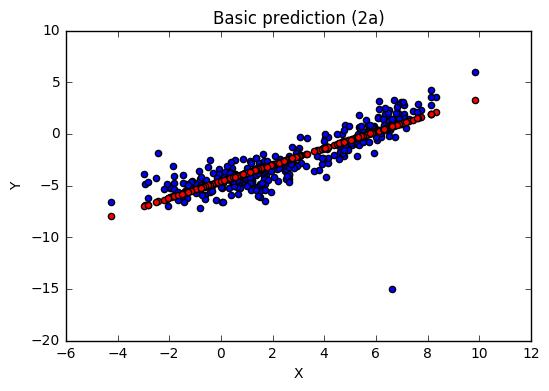

In [4]:
# Data Format

dat = pd.read_csv('A1-Problem2.csv', header=None).as_matrix()

resid = dat - np.mean(dat, axis=0)
resid = np.transpose(resid)  # Usually data vectors are columns, here it is rows
cov = resid.dot(np.transpose(resid)) / (resid[0, :].size - 1)
evals, evecs = np.linalg.eig(cov)

x_in = np.ones((len(dat[:,0]), 2))
x_in[:,1] = dat[:,0]
y_in = dat[:,1]

x_mat = np.matrix(x_in)  # Turn em into matrices
y_mat = np.transpose(np.matrix(y_in))


# Question 1
y_predict = x_mat * np.linalg.inv(x_mat.T * x_mat) * x_mat.T * y_mat

plt.figure()
plt.scatter(x_mat[:,1], y_mat, c='b')
plt.scatter(x_mat[:,1], y_predict, c='r')
plt.title('Basic prediction (2a)')
plt.xlabel('X')
plt.ylabel('Y')

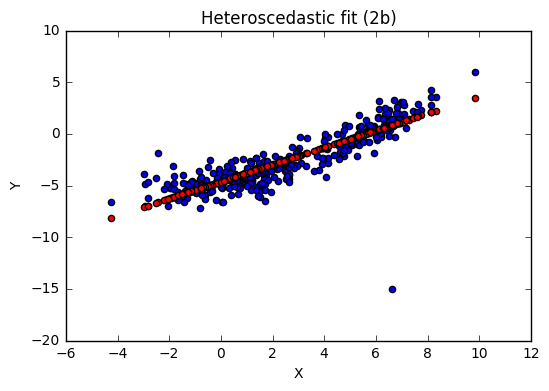

In [75]:
# Question 2

sy = np.matrix(dat[:,2])
W = np.linalg.inv(np.diag(np.square(sy).A1))
bHat = np.linalg.inv(x_in.T.dot(W).dot(x_in)).dot(x_in.T).dot(W).dot(y_mat)

y_predict_2 = x_mat.dot(bHat)

plt.figure()
plt.scatter(x_mat[:,1], y_mat, c='b')
plt.scatter(x_mat[:,1], y_predict_2, c='r')
plt.title('Heteroscedastic fit (2b)')
plt.xlabel('X')
plt.ylabel('Y')


In [9]:
import scipy.stats as st
# We will use values within ~3 standard deviations (about 99% confidence interval) of the mean
lo, hi = st.norm.interval(.99, loc = np.mean(dat[:,0]), scale = np.std(dat[:,0]))
print 'x lower bound: {}   x upper bound: {}'.format(lo, hi)

lo, hi = st.norm.interval(.99, loc = np.mean(dat[:,1]), scale = np.std(dat[:,1]))
print 'y lower bound: {}   y upper bound: {}'.format(lo, hi)


x lower bound: -4.90824521183   x upper bound: 10.1761201401
y lower bound: -9.62012443391   y upper bound: 4.67748150177


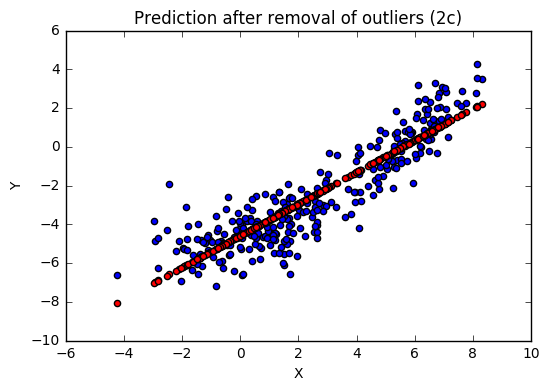

In [12]:
# Question 3
import scipy.stats as st

# Removing outliers
new_dat = dat[np.where(dat[:,0] < 10.17)]
new_dat = new_dat[np.where(new_dat[:,0] > -4.9)]
new_dat = new_dat[np.where(new_dat[:,1] > -9.6)]
new_dat = new_dat[np.where(new_dat[:,1] < 4.6)]

x_in = np.ones((len(new_dat[:,0]), 2))
x_in[:,1] = new_dat[:,0]
y_in = new_dat[:,1]

x_mat = np.matrix(x_in)  # Turn em into matrices
y_mat = np.transpose(np.matrix(y_in))

# Create a bHat based on the outlier-less data
bHat3 = np.linalg.inv(x_mat.T * x_mat) * x_mat.T * y_mat 
y_predict = x_mat * bHat3

plt.figure()
plt.scatter(x_mat[:,1], y_mat, c='b')
plt.scatter(x_mat[:,1], y_predict, c='r')
plt.title('Prediction after removal of outliers (2c)')
plt.xlabel('X')
plt.ylabel('Y')

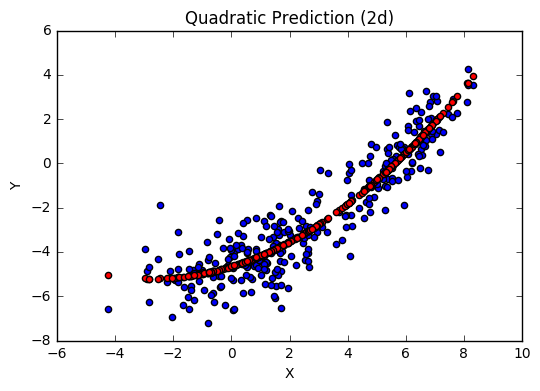

In [13]:
# Question 4, New Fit
# y = b0 + b1*x + b2*x^2
x_in = np.ones((len(new_dat[:,0]), 3))
x_in[:,1] = new_dat[:,0]
x_in[:,2] = np.square(new_dat[:,0])  # Create the quadratic term
y_in = new_dat[:,1]

x_mat = np.matrix(x_in)  # Turn em into matrices
y_mat = np.transpose(np.matrix(y_in))

# Create bHat for quadratic fit
bHat4 = np.linalg.inv(x_mat.T * x_mat) * x_mat.T * y_mat
y_predict = x_mat * bHat4

plt.figure()
plt.scatter(x_mat[:,1], y_mat, c='b')
plt.scatter(x_mat[:,1], y_predict, c='r')
plt.title('Quadratic Prediction (2d)')
plt.xlabel('X')
plt.ylabel('Y')

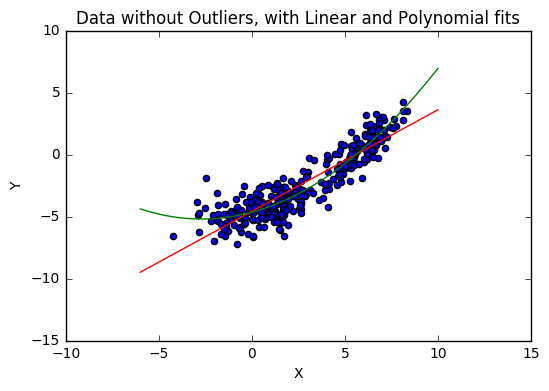

In [14]:
x_lin = np.ones((500, 2))
x_lin[:,1] = np.linspace(-6, 10, num=500)

x_quad = np.ones((500, 3))
x_quad[:,1] = np.linspace(-6, 10, num=500)
x_quad[:,2] = np.square(np.linspace(-6,10,num=500))

y_predict_1 = x_lin * bHat3  # Linear Fit

y_predict_2 = x_quad * bHat4 # Quadratic Fit

x_quad[:,1]

plt.figure()
plt.plot(x_lin[:,1], y_predict_1, 'r-')
plt.plot(x_lin[:,1], y_predict_2, 'g-')
plt.scatter(x_mat[:,1], y_mat, c='b')
plt.title('Data without Outliers, with Linear and Polynomial fits')
plt.xlabel('X')
plt.ylabel('Y')



Within the range of the data, the quadratic and linear fits fit the data relatively similarly. When plotting on the range [-6,10] instead, the differences between the fits is much more obvious.

The quadratic fit appears to better capture the "curve" of the data points between x values of 0 and -3.5. Between these values, y appears to slightly increase with respect to x. 

On the 'right side' of the data set (towards more positive x), the quadratic fit also appears to capture the upwards curve of the data better than the linear fit. Therefore, we can conclude that quadratic fit is likely a better choice.



### Problem 3

- Characterize the 6-dimensional dataset in the [CSV](A1-Problem3.csv) file using Principal Component Analysis

>0. Scree plot: decide on number of components to keep (2 pts)
>0. Plot the relevant principal components (1 pt)
>0. Use whitening to further explore the data (1 pt)
>0. Describe with your words what you learnt about the dataset (1 pt)

> Total of 5 points

In [15]:
# Data Format

dat = pd.read_csv('A1-Problem3.csv', header=None).as_matrix()

resid = dat - np.mean(dat, axis=0)
resid = np.transpose(resid)  # Usually data vectors are columns, here it is rows
cov = resid.dot(np.transpose(resid)) / (resid[0, :].size - 1)
evals, evecs = np.linalg.eig(cov)


Only the first two eigenvalues are relevant, since they capture close to 100% of total variance


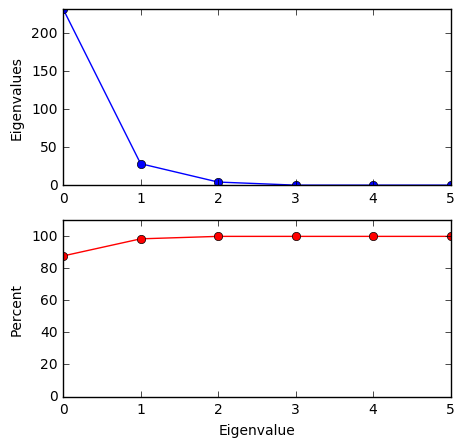

In [16]:
# Question 1

# Code below borrowed from T. Budavari, Data Mining Lecture 06
plt.figure(figsize=(5, 5))
plt.subplot(211); plt.ylim(0, max(evals)); plt.plot(evals, 'o-'); plt.ylabel('Eigenvalues')
plt.subplot(212); plt.ylim(0, 110); cl = np.cumsum(evals); plt.ylabel('Percent'); plt.plot(100 * cl / cl[-1], 'o-r');
plt.xlabel('Eigenvalue')
    
print "Only the first two eigenvalues are relevant, since they capture close to 100% of total variance"
    

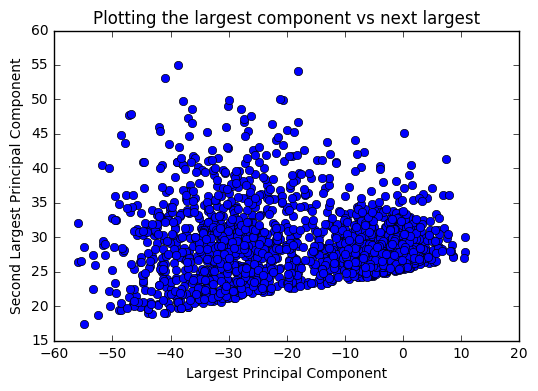

In [96]:
# Question 2

k = 2
dat_new = np.transpose(dat)  # Need columns to be instances, not rows
evecs_to_use = np.transpose(evecs[:, 0:k])
new_subspace = evecs_to_use.dot(dat_new)

plt.figure()
plt.plot(new_subspace[0, :], new_subspace[1, :], 'bo')
plt.title('Plotting the largest component vs next largest')
plt.xlabel('Largest Principal Component')
plt.ylabel('Second Largest Principal Component')

Note the change in scale for the whitened data


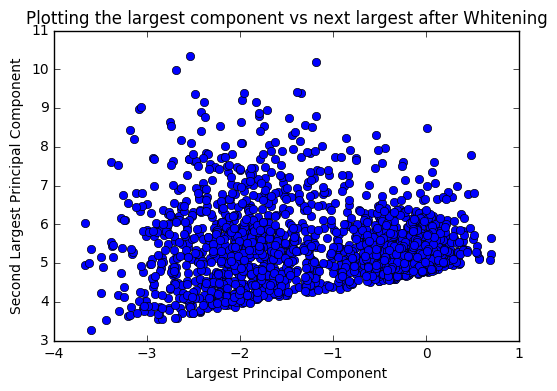

In [97]:
# Question 3

dat_to_use = np.transpose(dat)
temp = np.transpose(evecs).dot(dat_to_use)

for i in evals:
    if i < 0:
        i = 0

Z = np.diag(1/np.sqrt(evals)).dot(temp)

plt.figure()
plt.plot(Z[0,:], Z[1,:], 'bo')
plt.title('Plotting the largest component vs next largest after Whitening')
plt.xlabel('Largest Principal Component')
plt.ylabel('Second Largest Principal Component')
    
print "Note the change in scale for the whitened data"

#### Question 4

Because the first two eigenvectors (plotted) capture so much of the variance in the data, it is superfluous to plot the other principal components as well, as they will essentially look like random noise.

Looking at these largest two principal components, it appears as though component two has a floor that is some function of component one. Hence, we see the hard boundary along the axis of component two.

Observing whitening in action is very informative. The shape of the spread of the data remains the same before and after whitening. However, we see that the variance has decreased to one along all axes, as shown by the change in scale between non-whitened and whitened data.